<a href="https://colab.research.google.com/github/AndreMouraL/Engenharia-de-Controle-Tarefa-da-aula-dia-17.04/blob/main/Engenharia_de_Controle_Tarefa_da_aula_dia_17_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esta tarefa será apenas para aprendizado e contará como ponto extra.

Vcs deverão resolver e simular (Matlab ou Python) as questões B.2.4, B.2.5, B.2.6, B.2.7, B.2.8, B.2.9, B.2.12 e B.2.13 do Cap. 2 do Livro do Ogata 5. ed.

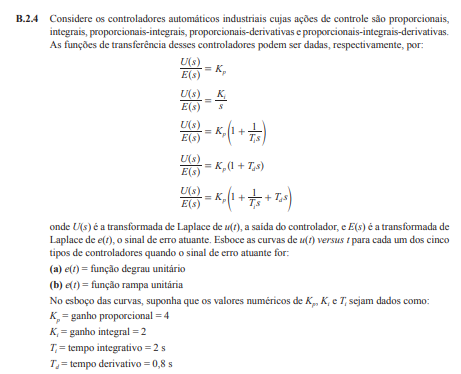

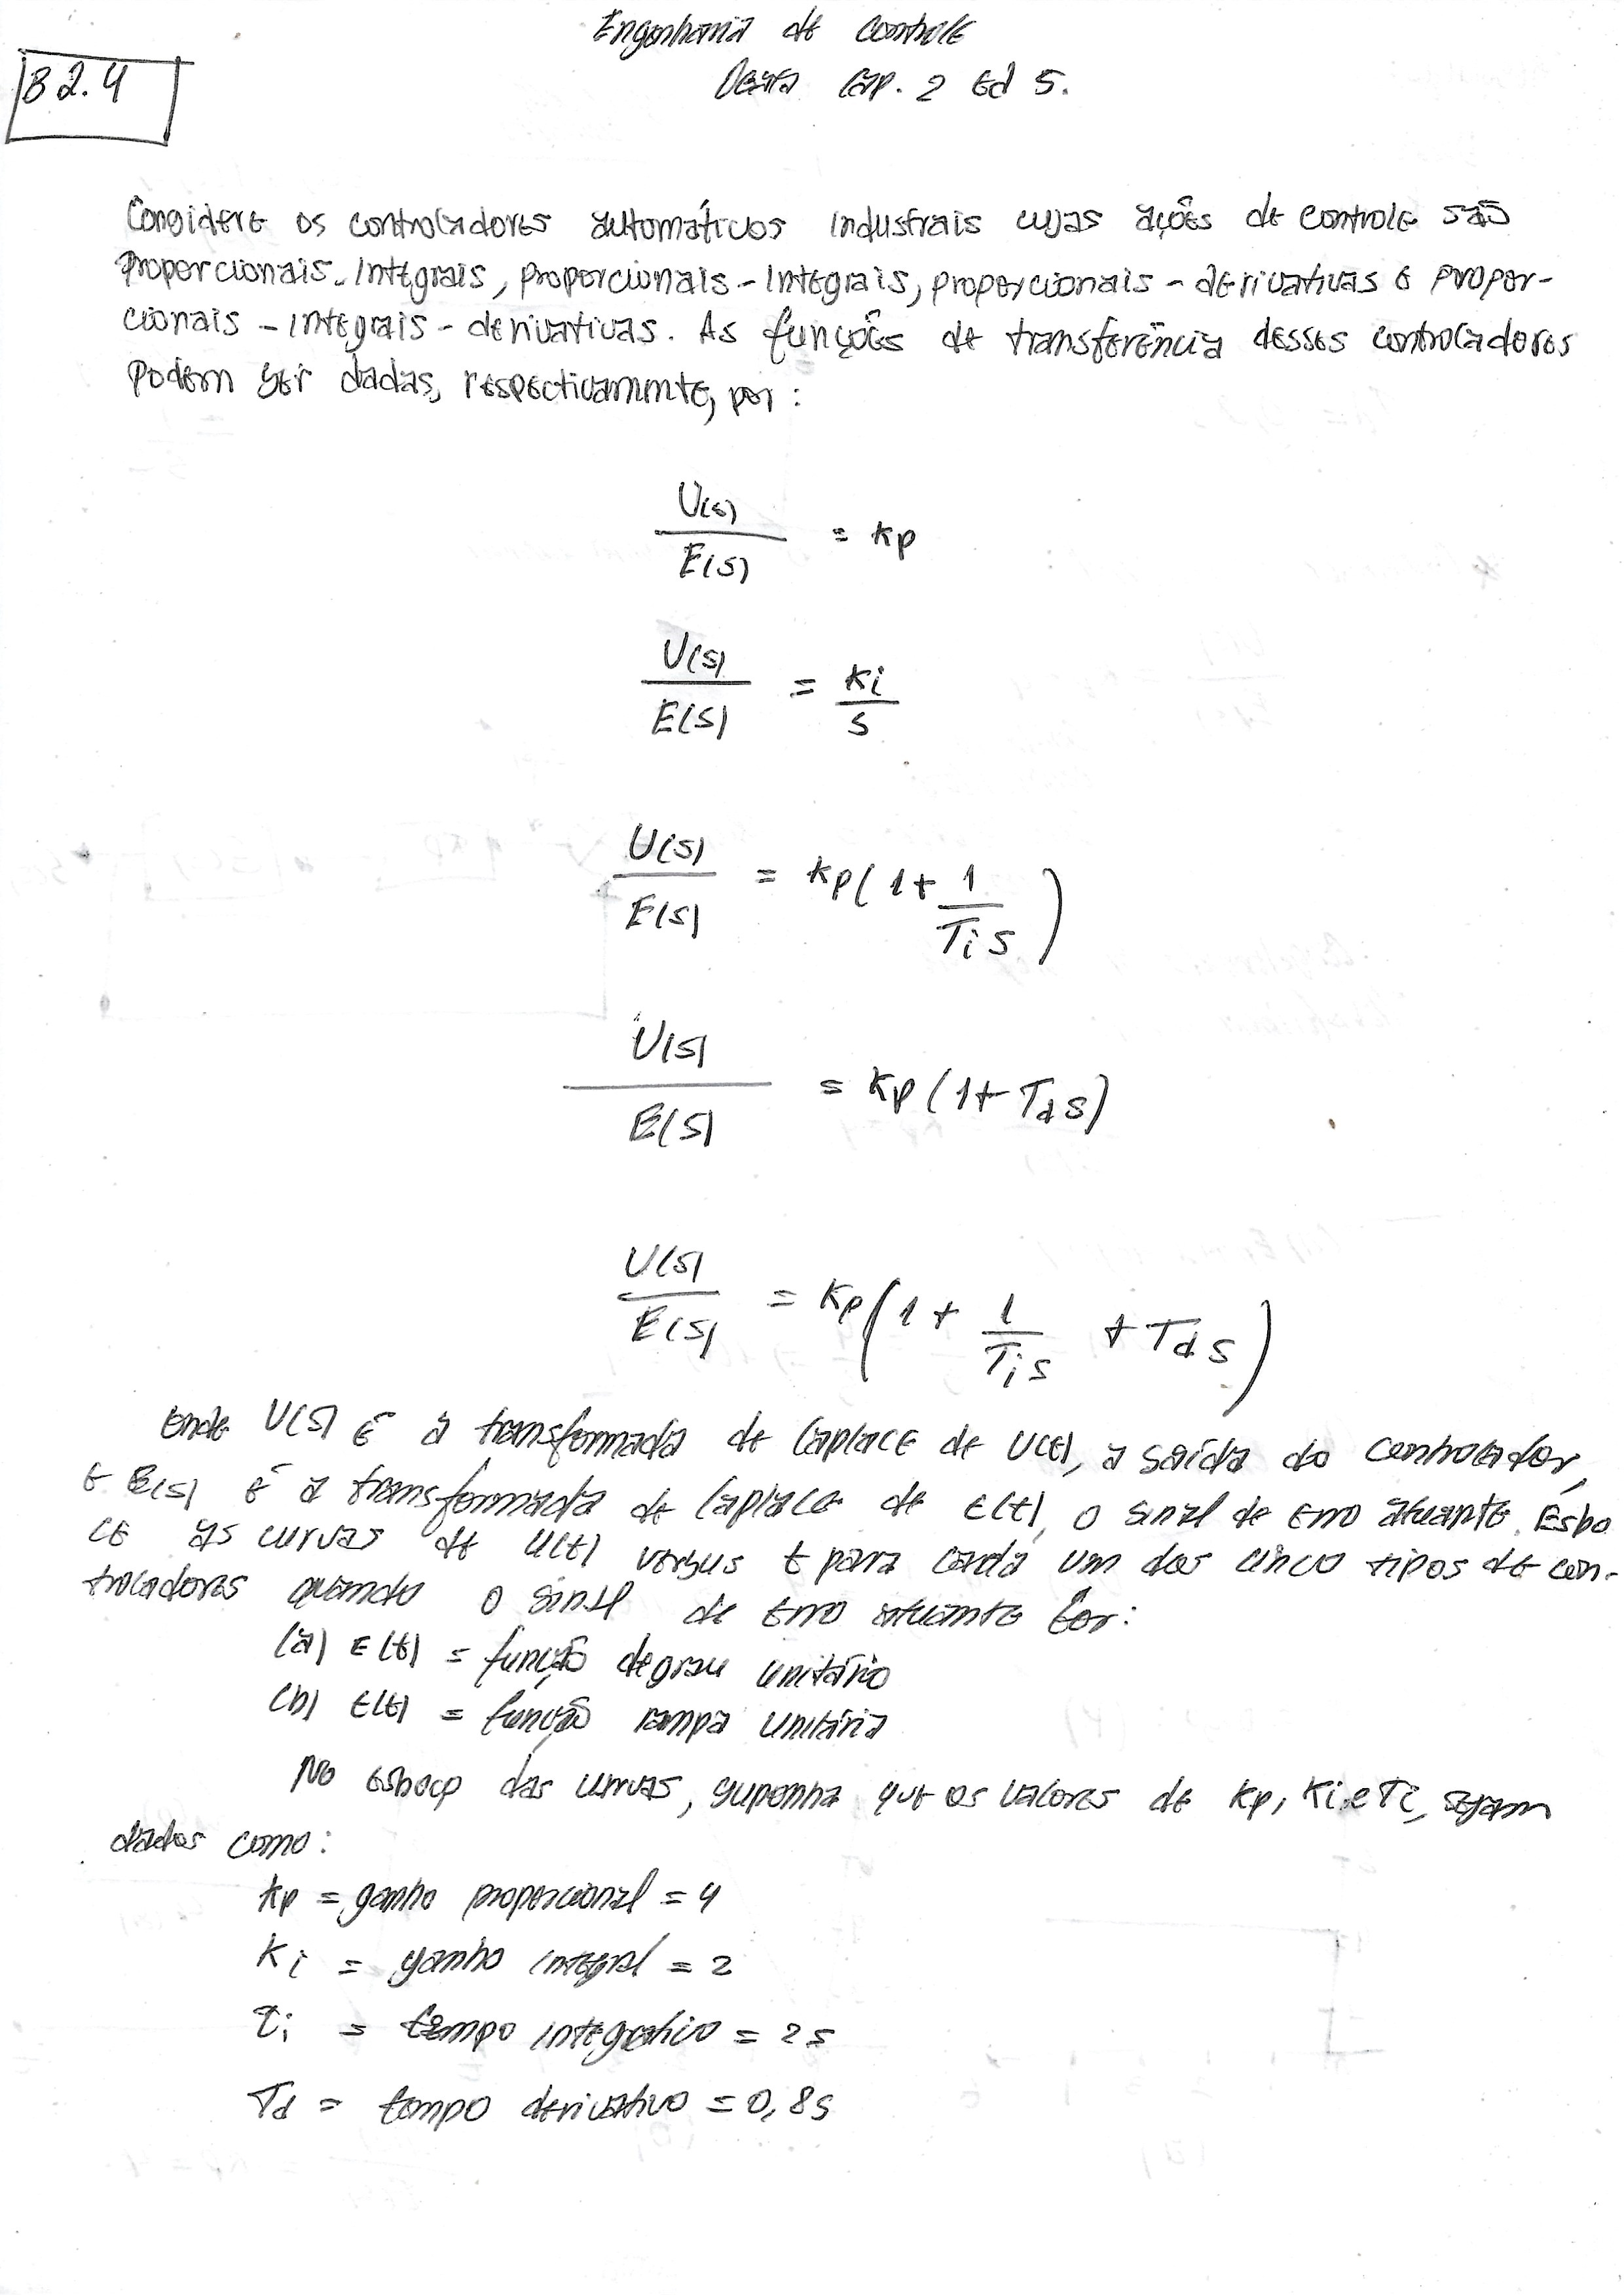

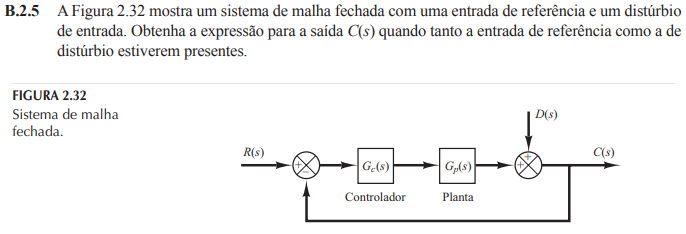

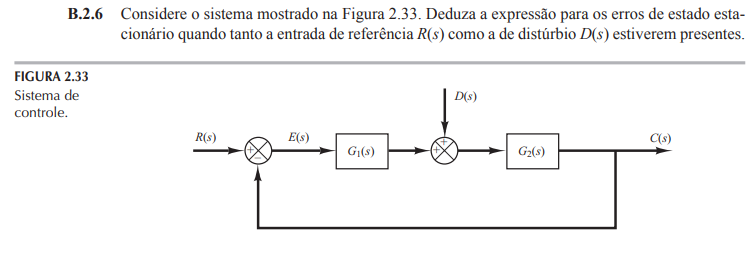

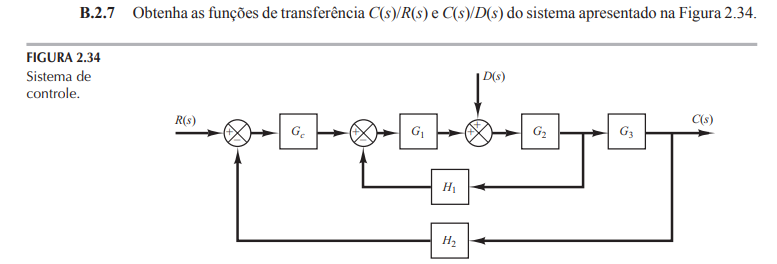

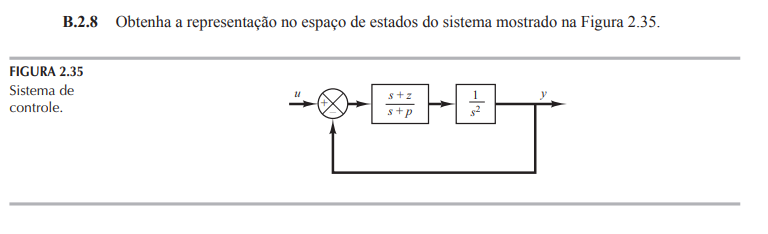

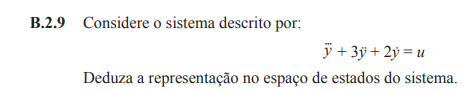

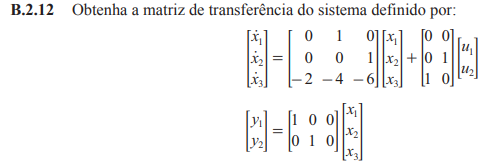

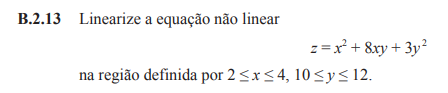